In [42]:
from keras.datasets import cifar10
from keras.utils import to_categorical 
import sys
import os
from typing import Tuple

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')


import fema_classifier
import fema_feature_learning
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [44]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [45]:
train_x = np.reshape(X_train,(50000,3072))
test_x = np.reshape(X_test,(10000,3072))
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [65]:
train_y = y_train.reshape(y_train.shape[0],1)
test_y = y_test.reshape(y_test.shape[0],1)

In [66]:
model_fl = fema_feature_learning.FEMaFeatureLearning(k=10,basis=fema_classifier.Basis.radialBasis)

_x, eval_x, _y, eval_y = train_test_split(train_x, train_y, test_size=0.05)
print(eval_x.shape, eval_y.shape)

features_weigths = model_fl.fit(eval_x, eval_y, np.array([0]), np.array([0]))


(2500, 3072) (2500, 1)
Running:  0.0  concluded.
Running:  0.1  concluded.
Running:  0.2  concluded.
Running:  0.3  concluded.
Running:  0.4  concluded.
Running:  0.5  concluded.
Running:  0.6  concluded.
Running:  0.7  concluded.
Running:  0.8  concluded.
Running:  0.9  concluded.


In [64]:
print(train_y.shape)
print(train_y.reshape((50000,1)).shape)

(50000,)
(50000, 1)


In [73]:
model_fl.features_weigth.shape

(2, 10, 3072)

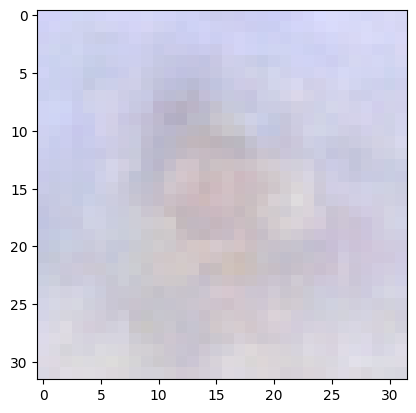

In [75]:
plt.imshow(model_fl.features_weigth[model_fl.INTRA,2].reshape(32,32,3)/np.max(model_fl.features_weigth[model_fl.INTRA,2]))

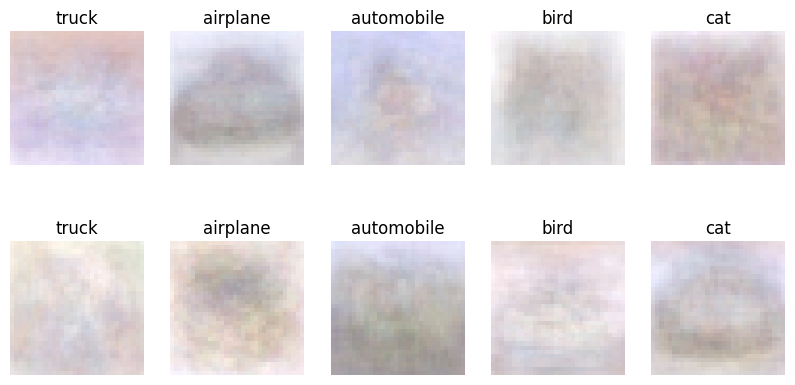

In [77]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTRA,count-1].reshape(32,32,3)/np.max(model_fl.features_weigth[model_fl.INTRA,count-1]) )
        plt.axis('off')
        plt.title(cifar_classes[c-1])           

        count = count+1


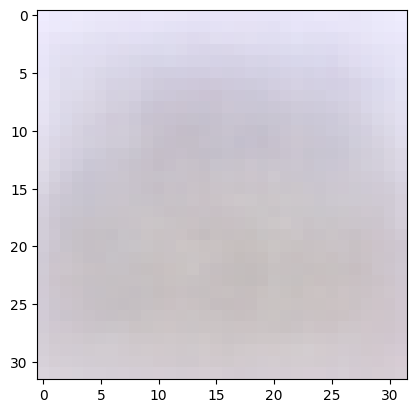

In [82]:
fl_weigths = np.zeros((model_fl.features_weigth.shape[2]))
n_classes = 10

for c in range(n_classes):
    for f in range(train_x.shape[1]):
        fl_weigths[f] = fl_weigths[f] + (features_weigths[model_fl.INTER, c, f]+features_weigths[model_fl.INTRA, c, f])/n_classes

max_w = np.max(fl_weigths)
for f in range(train_x.shape[1]):
    fl_weigths[f] = fl_weigths[f]/max_w

plt.imshow(fl_weigths.reshape(32,32,3))

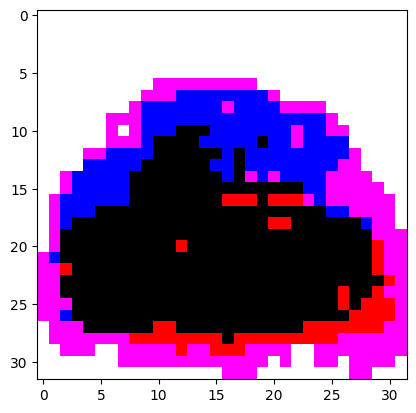

In [95]:
th = 0.8
selected_features = np.where(fl_weigths > th, 255, 0)
plt.imshow(selected_features.reshape(32,32,3))

In [90]:
np.min(fl_weigths),np.max(fl_weigths),np.mean(fl_weigths),np.median(fl_weigths)

(0.7379181107953148, 1.0, 0.8188575851149394, 0.8014645411872242)